# INTRODUCCIÓN A LA PROGRAMACIÓN CON PYTHON I

## Módulo 6 - Aplicaciones

Los fundamentos de las clases pasadas son indispensables para una variedad de análisis más complejo. Hoy cubriremos 4 ejemplos de análisis que se pueden hacer con Python y las bibliotecas que nos ayudan a hacerlo:
- Regresión Lineal Múltiple
- Regresión Logística
- Datos geográficos


### 6.5 Datos geográficos
Antes de iniciar, asegúrate que tienes todos los archivos llamados `MexMun1.*` en la carpeta `files/MexMun/`. También asegúrate de haber instalado la biblioteca geopandas según las instrucciones en Slack.

La biblioteca `geopandas` es muy similar a `pandas` en el sentido de que ambas permiten trabajar con "tablas" de datos y hacer operaciones sobre ellas. `geopandas` extiende las capacidades de `pandas` para que pueda soportar información geográfica que proviene de archivos tipo *shape*.

Si nunca has trabajado con shape files, lo único que debes saber es que la información geográfica se guarda en archivos que a su vez contienen "polígonos" - algo así como mini figuras del mapa. Cuando los polígonos los asignas además a un sistema de coordenadas, puedes graficarlos y obtener un mapa con coordenadas exactas. Además, cada polígono puede tener relacionada información. 

Por ejemplo, en el caso del censo, tenemos la información de los 2,456 municipios del país (ref: http://cuentame.inegi.org.mx/territorio/division/default.aspx, considerando las 16 alcaldías de la CDMX). En el archivo `MexMun1.shp/shx/cpg/dbf/prj/sbn` viene toda la información correspondiente a lo arriba descrito: polígonos, coordenadas geográficas, información de cada shape, etc. No tenemos que preocuparnos por nada mas que por asegurarnos que los archivos están en la carpeta y luego usar `geopandas` para acceder a ellos.

In [69]:
# así como con pandas típicamente usamos el alias "pd"
# con geopandas usamos el alias "gpd"
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
# Definimos como path un folder completo, en vez de solo
# un archivo. Una base geográfica es típicamente más de un 
# archivo, y éstos se suelen guardar en folders completos
path_shp = "files/MexMun/"

# así como con pandas usamos read_csv/excel/etc, aquí podemos
# usar read_file
gdf = gpd.read_file(path_shp)

In [71]:
gdf.columns

Index(['OBJECTID', 'CVEGEO', 'NOM_ENT', 'NOM_MUN', 'OID_1', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

In [72]:
gdf

,OBJECTID,CVEGEO,NOM_ENT,NOM_MUN,OID_1,Shape_Leng,Shape_Area,geometry
0,1,01001,Aguascalientes,Aguascalientes,1,2.420713,0.102900,"POLYGON ((-102.10641 22.06035, -102.10368 22.0..."
1,2,01002,Aguascalientes,Asientos,2,1.804404,0.048057,"POLYGON ((-102.05189 22.29144, -102.05121 22.2..."
2,3,01003,Aguascalientes,Calvillo,3,1.610751,0.081518,"POLYGON ((-102.68569 22.09963, -102.69087 22.0..."
3,4,01004,Aguascalientes,Coso,4,0.690669,0.011375,"POLYGON ((-102.28787 22.41649, -102.28753 22.4..."
4,5,01005,Aguascalientes,Jess Mara,5,1.541208,0.044144,"POLYGON ((-102.33568 22.05067, -102.33348 22.0..."
...,...,...,...,...,...,...,...,...
2451,2452,32054,Zacatecas,Villa Hidalgo,2452,1.126578,0.032921,"POLYGON ((-101.69490 22.51777, -101.69472 22.5..."
2452,2453,32055,Zacatecas,Villanueva,2453,3.312681,0.190977,"POLYGON ((-102.78252 22.67373, -102.78221 22.6..."
2453,2454,32056,Zacatecas,Zacatecas,2454,1.316645,0.038812,"POLYGON ((-102.76690 22.84147, -102.76619 22.8..."
2454,2455,32057,Zacatecas,Trancoso,2455,0.625554,0.019414,"POLYGON ((-102.22547 22.80920, -102.22946 22.7..."


<AxesSubplot:>

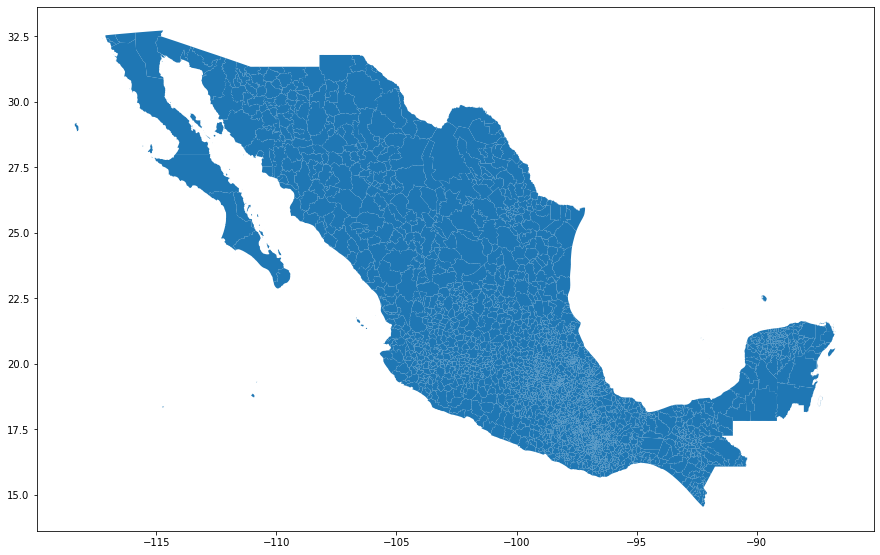

In [24]:
# podemos aprovechar que geopandas trae incluidos métodos para
# graficar nuestras bases geográficas
gdf["geometry"].plot(figsize=(15,15))

In [10]:
gdf.shape

(2456, 8)

In [14]:
gdf

,OBJECTID,CVEGEO,NOM_ENT,NOM_MUN,OID_1,Shape_Leng,Shape_Area,geometry
0,1,01001,Aguascalientes,Aguascalientes,1,2.420713,0.102900,"POLYGON ((-102.10641 22.06035, -102.10368 22.0..."
1,2,01002,Aguascalientes,Asientos,2,1.804404,0.048057,"POLYGON ((-102.05189 22.29144, -102.05121 22.2..."
2,3,01003,Aguascalientes,Calvillo,3,1.610751,0.081518,"POLYGON ((-102.68569 22.09963, -102.69087 22.0..."
3,4,01004,Aguascalientes,Coso,4,0.690669,0.011375,"POLYGON ((-102.28787 22.41649, -102.28753 22.4..."
4,5,01005,Aguascalientes,Jess Mara,5,1.541208,0.044144,"POLYGON ((-102.33568 22.05067, -102.33348 22.0..."
...,...,...,...,...,...,...,...,...
2451,2452,32054,Zacatecas,Villa Hidalgo,2452,1.126578,0.032921,"POLYGON ((-101.69490 22.51777, -101.69472 22.5..."
2452,2453,32055,Zacatecas,Villanueva,2453,3.312681,0.190977,"POLYGON ((-102.78252 22.67373, -102.78221 22.6..."
2453,2454,32056,Zacatecas,Zacatecas,2454,1.316645,0.038812,"POLYGON ((-102.76690 22.84147, -102.76619 22.8..."
2454,2455,32057,Zacatecas,Trancoso,2455,0.625554,0.019414,"POLYGON ((-102.22547 22.80920, -102.22946 22.7..."


In [16]:
# Podemos hacer filtros de datos como con pandas 
ags = gdf.loc[gdf['NOM_ENT'] == "Aguascalientes"]
ags

,OBJECTID,CVEGEO,NOM_ENT,NOM_MUN,OID_1,Shape_Leng,Shape_Area,geometry
0,1,01001,Aguascalientes,Aguascalientes,1,2.420713,0.102900,"POLYGON ((-102.10641 22.06035, -102.10368 22.0..."
1,2,01002,Aguascalientes,Asientos,2,1.804404,0.048057,"POLYGON ((-102.05189 22.29144, -102.05121 22.2..."
2,3,01003,Aguascalientes,Calvillo,3,1.610751,0.081518,"POLYGON ((-102.68569 22.09963, -102.69087 22.0..."
3,4,01004,Aguascalientes,Coso,4,0.690669,0.011375,"POLYGON ((-102.28787 22.41649, -102.28753 22.4..."
4,5,01005,Aguascalientes,Jess Mara,5,1.541208,0.044144,"POLYGON ((-102.33568 22.05067, -102.33348 22.0..."
5,6,01006,Aguascalientes,Pabelln de Arteaga,6,0.994498,0.017308,"POLYGON ((-102.25345 22.18302, -102.25130 22.1..."
6,7,01007,Aguascalientes,Rincn de Romos,7,1.526277,0.032962,"POLYGON ((-102.22684 22.37393, -102.22661 22.3..."
7,8,01008,Aguascalientes,San Jos de Gracia,8,1.707200,0.075876,"POLYGON ((-102.45611 22.32323, -102.45537 22.3..."
8,9,01009,Aguascalientes,Tepezal,9,0.837712,0.020329,"POLYGON ((-102.17985 22.35353, -102.18029 22.3..."
9,10,01010,Aguascalientes,El Llano,10,1.365274,0.044507,"POLYGON ((-102.02946 22.06225, -102.02702 22.0..."


<AxesSubplot:>

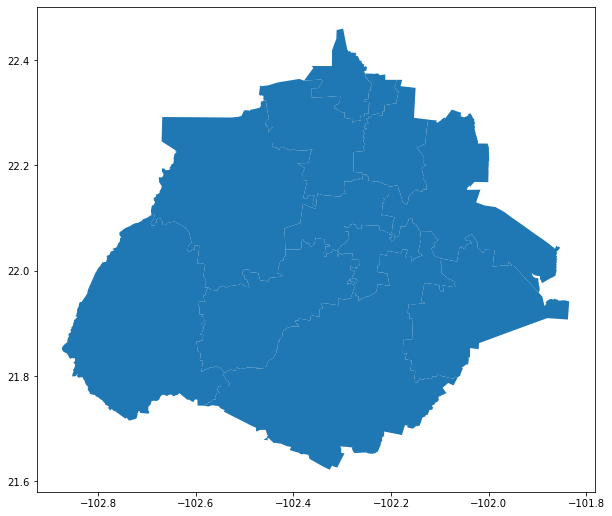

In [25]:
ags.plot(figsize=(10,10))

Text(0.5, 1.0, 'Área de municipios de Aguascalientes')

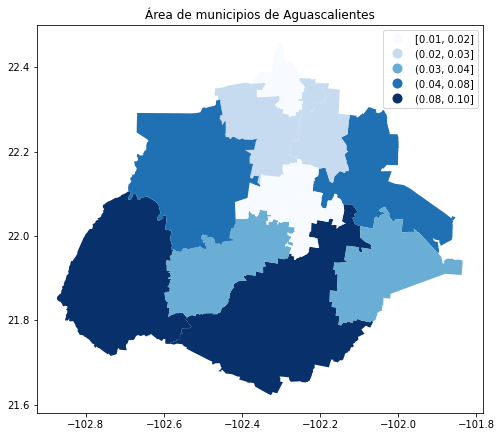

In [33]:
# aprovechando que tenemos el área de cada municipio, hasta podríamos
# colorear cada municipio según qué tan grande es
ags.plot(column='Shape_Area', cmap = 'Blues', figsize=(8,8), scheme="Quantiles", legend = True)
plt.title("Área de municipios de Aguascalientes")
# column - la columna que queremos graficar
# cmap - paletas de colores preinstaladas con matplotlib: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# figsize - tamaño del mapa
# scheme - manera de particionar los posibles valores de la variable de interés
# legend - información sobre qué significa cada color y su rango de valores

In [73]:
gdf.NOM_ENT.unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Distrito Federal', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Mxico', 'Michoacn de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo Len', 'Oaxaca', 'Puebla', 'Quertaro',
       'Quintana Roo', 'San Luis Potos', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'Yucatn', 'Zacatecas'], dtype=object)

Text(0.5, 1.0, 'Área de delegaciones del DF')

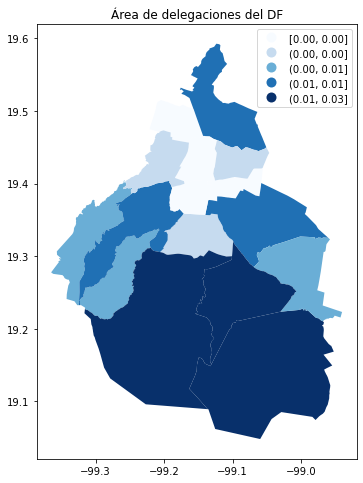

In [74]:
## Ejercicio: toma algún otro estado de la república y grafica el área como lo hicimos arriba
cdmx = gdf.loc[gdf['NOM_ENT'] == "Distrito Federal"]
cdmx.plot(column='Shape_Area', cmap = 'Blues', figsize=(8,8), scheme="Quantiles", legend = True)
plt.title("Área de delegaciones del DF")

In [77]:
cdmx.sort_values(by="Shape_Area", ascending=False)

,OBJECTID,CVEGEO,NOM_ENT,NOM_MUN,OID_1,Shape_Leng,Shape_Area,geometry
275,276,09012,Distrito Federal,Tlalpan,276,0.936431,0.027016,"POLYGON ((-99.19671 19.30240, -99.19629 19.302..."
272,273,09009,Distrito Federal,Milpa Alta,273,0.707665,0.025611,"POLYGON ((-98.99718 19.22747, -98.99723 19.227..."
276,277,09013,Distrito Federal,Xochimilco,277,0.561063,0.009805,"POLYGON ((-99.13301 19.21010, -99.13832 19.215..."
270,271,09007,Distrito Federal,Iztapalapa,271,0.522858,0.009730,"POLYGON ((-99.05813 19.40072, -99.05814 19.400..."
273,274,09010,Distrito Federal,lvaro Obregn,274,0.726858,0.008244,"POLYGON ((-99.18906 19.39559, -99.18871 19.394..."
268,269,09005,Distrito Federal,Gustavo A. Madero,269,0.524893,0.007565,"POLYGON ((-99.11789 19.59059, -99.11860 19.584..."
274,275,09011,Distrito Federal,Tlhuac,275,0.519722,0.007377,"POLYGON ((-98.97893 19.32393, -98.97856 19.323..."
267,268,09004,Distrito Federal,Cuajimalpa de Morelos,268,0.613220,0.006144,"POLYGON ((-99.25738 19.40112, -99.25698 19.400..."
271,272,09008,Distrito Federal,La Magdalena Contreras,272,0.442513,0.005450,"POLYGON ((-99.24489 19.27621, -99.24476 19.276..."
266,267,09003,Distrito Federal,Coyoacn,267,0.311425,0.004636,"POLYGON ((-99.18079 19.34714, -99.18076 19.347..."


¿Cómo aprovechar toda la demás información que tenemos del censo para verla de manera espacial?

Con las herramientas que tenemos hasta hoy, podemos cruzar la información de bases geográficas con aquella de bases regulares. Tomemos los datos del censo y hagamos algún análisis con respecto a la tasa de desempleo.

In [78]:
import pandas as pd
path = "files/CensosLimpiosTodo.csv"
df = pd.read_csv(path, header=0, index_col=0) 

In [79]:
df

,year,CVEGEO,X.1,X,POBTOT,Men,Women,SinSS,InMigrants,Illiterate,...,CEL,INTER,Unemploy,POB_TOT,GM,Rural,ZMCONURB,ZM,ENT,PRO_OVP
1,2000,10001,293,293,31291.000000,0.492921,0.507079,0.630021,0.022243,0.052219,...,0.000000,0.000000,0.013273,31291.000000,Bajo,0,0,0,10,4.290000
2,2000,10002,294,294,4298.000000,0.501396,0.498604,0.889251,0.015123,0.191935,...,0.000000,0.000000,0.005476,4298.000000,Alto,1,0,0,10,4.890000
3,2000,10003,295,295,4554.000000,0.483531,0.516469,0.808959,0.023276,0.062976,...,0.000000,0.000000,0.028777,4554.000000,Medio,0,0,0,10,4.950000
4,2000,10004,296,296,32805.000000,0.496174,0.503826,0.648529,0.033257,0.053457,...,0.000000,0.000000,0.014769,32805.000000,Bajo,0,0,0,10,4.490000
5,2000,10005,297,297,491436.000000,0.481994,0.518006,0.415454,0.029341,0.031460,...,0.000000,0.000000,0.013474,491436.000000,Muy bajo,0,0,0,10,4.360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43505,2016,9013,39969,39969,416105.664378,0.476650,0.523350,0.192101,0.061032,0.017179,...,0.867467,0.498718,0.129135,416105.664378,Muy bajo,0,1,1,9,3.940050
43506,2016,9014,39970,39970,423813.367907,0.463328,0.536672,0.166185,0.188937,0.006913,...,0.948185,0.852798,0.075166,423813.367907,Muy bajo,0,1,1,9,2.518229
43507,2016,9015,39971,39971,532684.630700,0.475957,0.524043,0.220098,0.135479,0.007277,...,0.911932,0.701748,0.108473,532684.630700,Muy bajo,0,1,1,9,2.733861
43508,2016,9016,39972,39972,362712.620004,0.457548,0.542452,0.161812,0.150495,0.005942,...,0.933020,0.806740,0.088130,362712.620004,Muy bajo,0,1,1,9,2.761300


In [80]:
df_filt = df.loc[~df.duplicated()]
df_filt = df_filt.loc[df_filt["year"] == 2010]
len(df_filt.CVEGEO.unique()) 
#por alguna extraña razón tenemos más claves geográficas que las correspondientes
# a los municipios, pero no importa ya que al unir las bases, solo nos quedamos con 
# aquellos municipios que están en ambas 

2457

In [39]:
gdf.columns

Index(['OBJECTID', 'CVEGEO', 'NOM_ENT', 'NOM_MUN', 'OID_1', 'Shape_Leng',
       'Shape_Area', 'geometry'],
      dtype='object')

In [41]:
df.columns

Index(['year', 'CVEGEO', 'X.1', 'X', 'POBTOT', 'Men', 'Women', 'SinSS',
       'InMigrants', 'Illiterate', 'GRADOESCO', 'IndigenouL', 'PISONTIERRA',
       'NSERVICIO', 'VP_SBIENE', 'TV', 'REFRI', 'WASHER', 'PHONE', 'CAR',
       'JEFAM', 'PISOTIERRA', 'PC', 'CEL', 'INTER', 'Unemploy', 'POB_TOT',
       'GM', 'Rural', 'ZMCONURB', 'ZM', 'ENT', 'PRO_OVP'],
      dtype='object')

Si recuerdas, con pandas podíamos unir la infomación de dos tablas a través de una "llave única". En este caso, la llave única es la columna `CVEGEO` que existe en ambas tablas.

In [45]:
# voy a quitar un par de columnas que no me sirven
gdf = gdf[["CVEGEO", "NOM_ENT", "NOM_MUN", "Shape_Leng", "Shape_Area", "geometry"]]
df_filt = df_filt[['year', 'CVEGEO', 'POBTOT', 'Men', 'Women', 'SinSS',
       'InMigrants', 'Illiterate', 'GRADOESCO', 'IndigenouL', 'PISONTIERRA',
       'NSERVICIO', 'VP_SBIENE', 'TV', 'REFRI', 'WASHER', 'PHONE', 'CAR',
       'JEFAM', 'PISOTIERRA', 'PC', 'CEL', 'INTER', 'Unemploy', 'POB_TOT',
       'GM', 'Rural', 'ZMCONURB', 'ZM', 'ENT', 'PRO_OVP']]

In [46]:
# Para aquellos que saben de bases de datos, esto es un JOIN
# desafortunadamente, el método se llama merge en pandas/geopandas :(

# join ocurre con la llave CVEGEO, y es un inner join
new_df = df_filt.merge(gdf, on="CVEGEO", how="inner")

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

¡Qué terror! No podemos hacer join porque las variables CVEGEO no son del mismo tipo en ambas tablas. ¿Se acuerdan que al principio hablábamos de como ciertas operaciones tienen que suceder con el mismo tipo de variables? Ese aprendizaje sigue siendo cierto hasta para estas operaciones. Resulta que en `gdf`, `CVEGEO` es un `object` (whatever that means) que tiene cara de `string`; en `df`, `CVEGEO` parece ser un número. Intentemos convertir entonces `CVEGEO` de `gdf` a un entero!

In [81]:
gdf.CVEGEO

0       01001
1       01002
2       01003
3       01004
4       01005
        ...  
2451    32054
2452    32055
2453    32056
2454    32057
2455    32058
Name: CVEGEO, Length: 2456, dtype: object

In [82]:
df_filt.CVEGEO

25441    10001
25442    10002
25443    10003
25444    10004
25445    10005
         ...  
28328     9013
28329     9014
28330     9015
28331     9016
28332     9017
Name: CVEGEO, Length: 2552, dtype: int64

In [83]:
# se acuerdan de la función map? podemos usarla para convertir nuestra
# variable en enteros de manera súper rápida
gdf["CVEGEO"] = gdf["CVEGEO"].map(int)

In [84]:
gdf.CVEGEO #yei, ahora CVEGEO es entero

0        1001
1        1002
2        1003
3        1004
4        1005
        ...  
2451    32054
2452    32055
2453    32056
2454    32057
2455    32058
Name: CVEGEO, Length: 2456, dtype: int64

In [85]:
# esta vez, el join no falla
# recuerda que para preservar la base geográfica, el join tiene que 
# hacerse con <gdf>.merge(<no_gdf>)
new_df = gdf.merge(df_filt, on="CVEGEO", how="inner")

In [86]:
new_df

,OBJECTID,CVEGEO,NOM_ENT,NOM_MUN,OID_1,Shape_Leng,Shape_Area,geometry,year,X.1,...,CEL,INTER,Unemploy,POB_TOT,GM,Rural,ZMCONURB,ZM,ENT,PRO_OVP
0,1,1001,Aguascalientes,Aguascalientes,1,2.420713,0.102900,"POLYGON ((-102.10641 22.06035, -102.10368 22.0...",2010,24761,...,0.779664,0.280933,0.062379,797010.0,Muy bajo,0,1,1,1,3.94
1,2,1002,Aguascalientes,Asientos,2,1.804404,0.048057,"POLYGON ((-102.05189 22.29144, -102.05121 22.2...",2010,24762,...,0.423492,0.031662,0.075913,45492.0,Medio,0,0,0,1,4.54
2,3,1003,Aguascalientes,Calvillo,3,1.610751,0.081518,"POLYGON ((-102.68569 22.09963, -102.69087 22.0...",2010,24763,...,0.474196,0.068343,0.097048,54136.0,Bajo,0,0,0,1,4.21
3,4,1004,Aguascalientes,Coso,4,0.690669,0.011375,"POLYGON ((-102.28787 22.41649, -102.28753 22.4...",2010,24764,...,0.457456,0.034035,0.085287,15042.0,Medio,0,0,0,1,4.34
4,5,1005,Aguascalientes,Jess Mara,5,1.541208,0.044144,"POLYGON ((-102.33568 22.05067, -102.33348 22.0...",2010,24765,...,0.715015,0.185744,0.049243,99590.0,Muy bajo,0,1,1,1,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,2452,32054,Zacatecas,Villa Hidalgo,2452,1.126578,0.032921,"POLYGON ((-101.69490 22.51777, -101.69472 22.5...",2010,27308,...,0.423077,0.038462,0.056154,18490.0,Medio,0,0,0,32,4.31
2547,2453,32055,Zacatecas,Villanueva,2453,3.312681,0.190977,"POLYGON ((-102.78252 22.67373, -102.78221 22.6...",2010,27309,...,0.442834,0.059392,0.037158,29395.0,Bajo,0,0,0,32,3.74
2548,2454,32056,Zacatecas,Zacatecas,2454,1.316645,0.038812,"POLYGON ((-102.76690 22.84147, -102.76619 22.8...",2010,27310,...,0.775139,0.353306,0.038736,138176.0,Muy bajo,0,1,1,32,3.82
2549,2455,32057,Zacatecas,Trancoso,2455,0.625554,0.019414,"POLYGON ((-102.22547 22.80920, -102.22946 22.7...",2010,27311,...,0.465802,0.044336,0.051832,16934.0,Bajo,0,0,0,32,4.61


In [62]:
ags_join = new_df.loc[new_df["NOM_ENT"]=="Aguascalientes"]
ags_join

,CVEGEO,NOM_ENT,NOM_MUN,Shape_Leng,Shape_Area,geometry,year,POBTOT,Men,Women,...,CEL,INTER,Unemploy,POB_TOT,GM,Rural,ZMCONURB,ZM,ENT,PRO_OVP
0,1001,Aguascalientes,Aguascalientes,2.420713,0.102900,"POLYGON ((-102.10641 22.06035, -102.10368 22.0...",2010,797010.0,0.484848,0.515152,...,0.779664,0.280933,0.062379,797010.0,Muy bajo,0,1,1,1,3.94
1,1002,Aguascalientes,Asientos,1.804404,0.048057,"POLYGON ((-102.05189 22.29144, -102.05121 22.2...",2010,45492.0,0.494856,0.505144,...,0.423492,0.031662,0.075913,45492.0,Medio,0,0,0,1,4.54
2,1003,Aguascalientes,Calvillo,1.610751,0.081518,"POLYGON ((-102.68569 22.09963, -102.69087 22.0...",2010,54136.0,0.484890,0.515110,...,0.474196,0.068343,0.097048,54136.0,Bajo,0,0,0,1,4.21
3,1004,Aguascalientes,Coso,0.690669,0.011375,"POLYGON ((-102.28787 22.41649, -102.28753 22.4...",2010,15042.0,0.487036,0.512964,...,0.457456,0.034035,0.085287,15042.0,Medio,0,0,0,1,4.34
4,1005,Aguascalientes,Jess Mara,1.541208,0.044144,"POLYGON ((-102.33568 22.05067, -102.33348 22.0...",2010,99590.0,0.492921,0.507079,...,0.715015,0.185744,0.049243,99590.0,Muy bajo,0,1,1,1,4.35
5,1006,Aguascalientes,Pabelln de Arteaga,0.994498,0.017308,"POLYGON ((-102.25345 22.18302, -102.25130 22.1...",2010,41862.0,0.481821,0.518179,...,0.612150,0.138806,0.083669,41862.0,Bajo,0,0,0,1,4.45
6,1007,Aguascalientes,Rincn de Romos,1.526277,0.032962,"POLYGON ((-102.22684 22.37393, -102.22661 22.3...",2010,49156.0,0.489605,0.510395,...,0.540265,0.115520,0.092527,49156.0,Bajo,0,0,0,1,4.43
7,1008,Aguascalientes,San Jos de Gracia,1.707200,0.075876,"POLYGON ((-102.45611 22.32323, -102.45537 22.3...",2010,8443.0,0.478858,0.521142,...,0.524487,0.080042,0.146699,8443.0,Bajo,0,0,0,1,4.46
8,1009,Aguascalientes,Tepezal,0.837712,0.020329,"POLYGON ((-102.17985 22.35353, -102.18029 22.3...",2010,19668.0,0.488103,0.511897,...,0.449843,0.031039,0.103072,19668.0,Medio,0,0,0,1,4.42
9,1010,Aguascalientes,El Llano,1.365274,0.044507,"POLYGON ((-102.02946 22.06225, -102.02702 22.0...",2010,18828.0,0.508445,0.491555,...,0.428228,0.033421,0.066165,18828.0,Medio,0,0,0,1,4.45


Text(0.5, 1.0, 'Tasa de Desempleo - Aguascalientes')

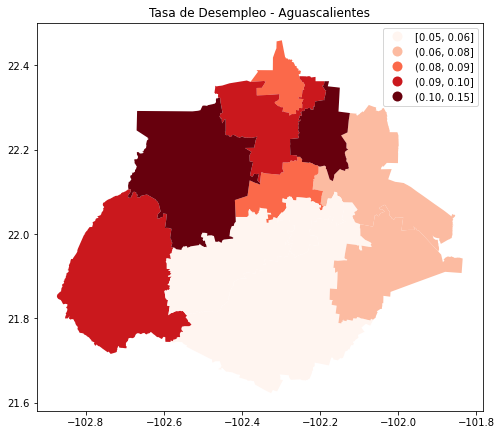

In [64]:
ags_join.plot(column='Unemploy', cmap = 'Reds', figsize=(8,8), scheme="Quantiles", legend = True)
plt.title("Tasa de Desempleo - Aguascalientes")

### Ejercicio
Toma la variable y el estado de tu interés, haz un mapa graficando la variable en el estado.  

In [87]:
new_df.columns

Index(['OBJECTID', 'CVEGEO', 'NOM_ENT', 'NOM_MUN', 'OID_1', 'Shape_Leng',
       'Shape_Area', 'geometry', 'year', 'X.1', 'X', 'POBTOT', 'Men', 'Women',
       'SinSS', 'InMigrants', 'Illiterate', 'GRADOESCO', 'IndigenouL',
       'PISONTIERRA', 'NSERVICIO', 'VP_SBIENE', 'TV', 'REFRI', 'WASHER',
       'PHONE', 'CAR', 'JEFAM', 'PISOTIERRA', 'PC', 'CEL', 'INTER', 'Unemploy',
       'POB_TOT', 'GM', 'Rural', 'ZMCONURB', 'ZM', 'ENT', 'PRO_OVP'],
      dtype='object')

/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Text(0.5, 1.0, 'Población Total - BC/BCS')

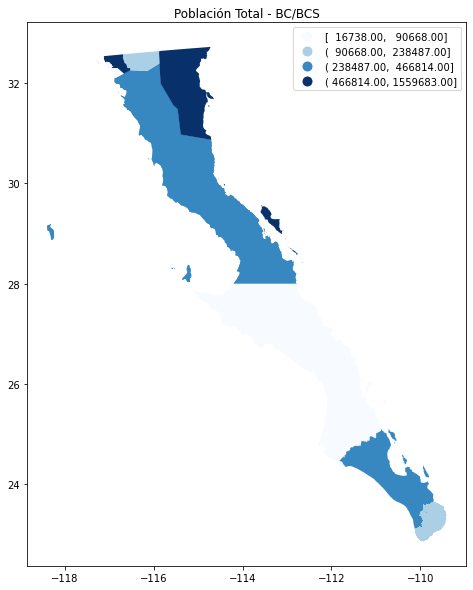

In [89]:
### aquí tu código
bc = new_df.loc[new_df["NOM_ENT"].isin(['Baja California', 'Baja California Sur'])]
bc.plot(column='POB_TOT', cmap = 'Blues', figsize=(10,10), scheme="Quantiles", legend = True)
plt.title("Población Total - BC/BCS")

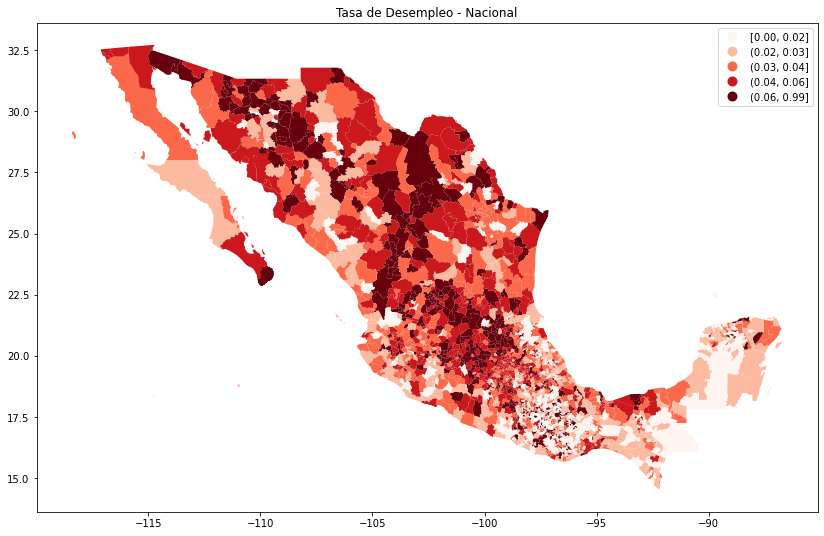

In [90]:
## Estos mapas, al igual que otras gráficas de matplotlib, se pueden 
## exportar como imágenes o pdfs. Basta con usar la instrucción savefig
## e indicar el nombre del archivo destino
new_df.plot(column='Unemploy', cmap = 'Reds', figsize=(14,14), scheme="Quantiles", legend = True)
plt.title("Tasa de Desempleo - Nacional")
plt.savefig('files/desempleo_nal.pdf')
plt.show()

### Ejercicio
Toma la variable desempleo, crea mapas para cada estado donde el color de cada municipio corresponda a la variable de desempleo.

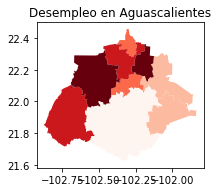

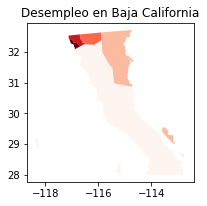

/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hsalvador/anaconda3/envs/geo_env/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


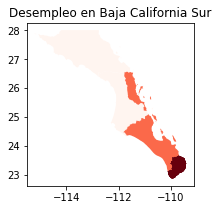

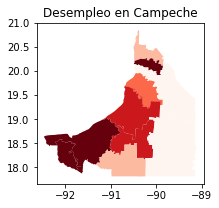

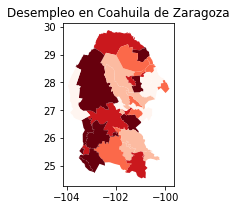

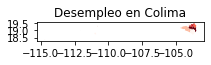

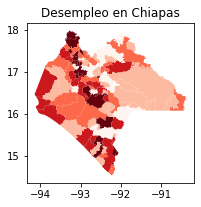

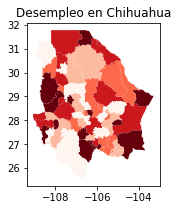

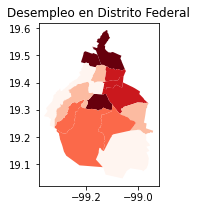

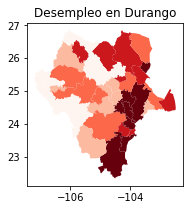

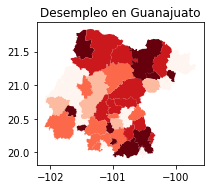

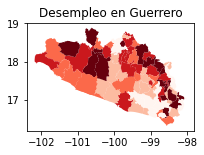

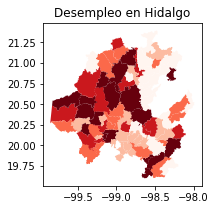

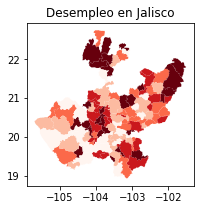

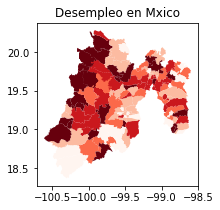

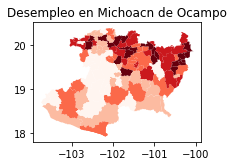

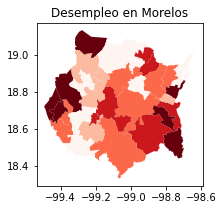

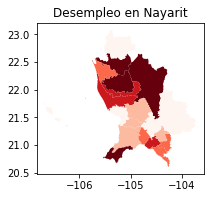

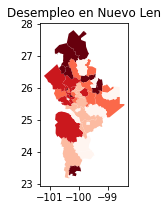

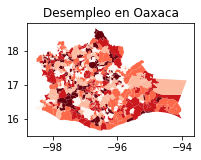

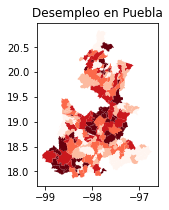

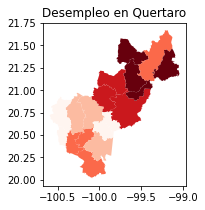

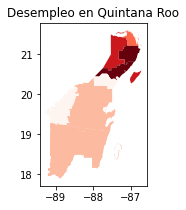

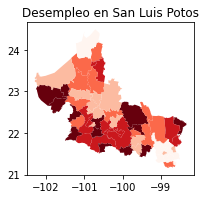

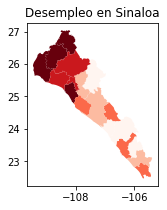

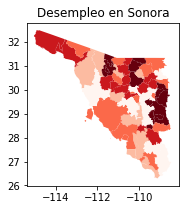

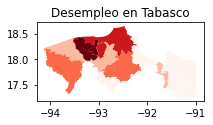

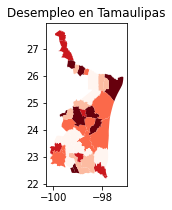

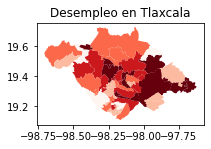

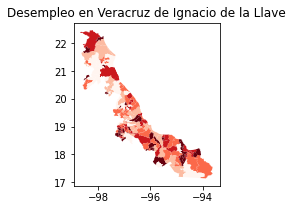

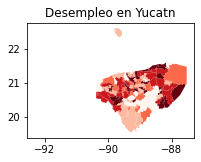

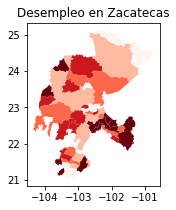

In [96]:
#### aquí tu código
estados = new_df["NOM_ENT"].unique()

for est in estados:
    df_temp = new_df.loc[new_df["NOM_ENT"] == est]
    df_temp.plot(column='Unemploy', cmap = 'Reds', figsize=(3,3), scheme="Quantiles")
    plt.title(f"Desempleo en {est}")
    plt.show()


In [91]:
new_df.columns

Index(['OBJECTID', 'CVEGEO', 'NOM_ENT', 'NOM_MUN', 'OID_1', 'Shape_Leng',
       'Shape_Area', 'geometry', 'year', 'X.1', 'X', 'POBTOT', 'Men', 'Women',
       'SinSS', 'InMigrants', 'Illiterate', 'GRADOESCO', 'IndigenouL',
       'PISONTIERRA', 'NSERVICIO', 'VP_SBIENE', 'TV', 'REFRI', 'WASHER',
       'PHONE', 'CAR', 'JEFAM', 'PISOTIERRA', 'PC', 'CEL', 'INTER', 'Unemploy',
       'POB_TOT', 'GM', 'Rural', 'ZMCONURB', 'ZM', 'ENT', 'PRO_OVP'],
      dtype='object')

In [92]:
estados = new_df["NOM_ENT"].unique()
estados

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Distrito Federal', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Mxico', 'Michoacn de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo Len', 'Oaxaca', 'Puebla', 'Quertaro',
       'Quintana Roo', 'San Luis Potos', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'Yucatn', 'Zacatecas'], dtype=object)

In [93]:
ejemplo = "Hola Bogdan"
print(f"Reemplazar texto aqui: {ejemplo}")

Reemplazar texto aqui: Hola Bogdan


In [94]:
print(f"Reemplazar texto aqui:", ejemplo)

Reemplazar texto aqui: Hola Bogdan


In [97]:
pwd

'/Users/hsalvador/Documents/cursosds/python1'